<a href="https://colab.research.google.com/github/souravasnoda/LEAF-DISEASES-CLASSIFICATION/blob/main/leaf_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOURAV SHARMA



# LEAF DISEASES DETECTION USING TRANSFER LEARNING( Inception V3 )

In [ ]:
import os
import pandas as pd
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import  InceptionV3,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential,load_model
from glob import glob
import numpy as np

In [ ]:
! pip install tensorflow-gpu

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:53<00:00, 54.2MB/s]
100% 2.70G/2.70G [00:53<00:00, 53.8MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

In [ ]:
img_size = [224,224]

In [ ]:
train_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
inception = InceptionV3(input_shape=img_size + [3],weights = 'imagenet',include_top=False)
#include_top=False because we wont use 1st and last layer

In [ ]:
for layer in inception.layers:
  layer.trainable  = False

In [ ]:
folders = glob('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*')

In [ ]:
folders #to check no. of classes in our folder

In [ ]:
x =Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders),activation='softmax')(x)#because we have multiple categories so we are using softmax

In [ ]:
model = Model(inputs = inception.input,outputs = prediction)

In [ ]:
model.summary()#all layers in our model

In [ ]:
model.compile(
    loss =  'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1.255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)#data augmentation

test_datagen  = ImageDataGenerator(rescale=1.255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224,224,),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 70295 images belonging to 38 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                                 target_size = (224,224,),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 17572 images belonging to 38 classes.


In [ ]:
r= model.fit_generator(
    training_set,
    validation_data=test_set,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


4394/4394 [==============================] - 1204s 266ms/step - loss: 341.1236 - accuracy: 0.3182 - val_loss: 387.2883 - val_accuracy: 0.4295


In [ ]:
# accuracy
_,acc = model.evaluate_generator(training_set,steps=len(test_set),
                                 verbose=0 )
print('> %3.f' % (acc*100.0))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


>  48


In [ ]:
import sys
import matplotlib.pyplot as pyplot
%matplotlib inline

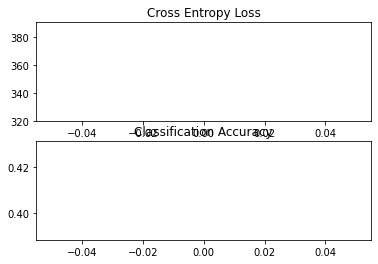

In [ ]:
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

In [ ]:
def run_example():
	# load the image
	img = load_image('download.jpg')
	# load model
	
	# predict the class
	result = model.predict(img)
	print(result[0])
 
# entry point, run the example
run_example()

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
